# Medical data visualization.

## Call libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/a-mt/fcc-medical-data-visualizer/master/medical_examination.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Overweight.

First was created the column with the BMI calculated. Then, was converted as the instruction, marking 0 for NOT overweight and 1 to overweight.

In [3]:
data['BMI'] = round(data['weight']/(data['height']*0.01)**2,2)
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.93
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.47
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.35
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.10


Once was calculated, then it was differentiated by the graters than 25.

In [4]:
data.loc[(data.BMI<=25, 'BMI')] = 0
data.loc[(data.BMI>25, 'BMI')] = 1

data



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.0


## Normalizing the data

The task says that every value greater than one will be replaced by one; every value equal to one will be replaced by 0.

In [5]:

data
chol = data['cholesterol'].value_counts()
print(chol)
gluc = data['gluc'].value_counts()
print(gluc)
smo = data['smoke'].value_counts()
print(smo)
alc = data['alco'].value_counts()
print(alc)
acti = data['active'].value_counts()
print(acti)
card = data['cardio'].value_counts()
print(card)


1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64
1    59479
3     5331
2     5190
Name: gluc, dtype: int64
0    63831
1     6169
Name: smoke, dtype: int64
0    66236
1     3764
Name: alco, dtype: int64
1    56261
0    13739
Name: active, dtype: int64
0    35021
1    34979
Name: cardio, dtype: int64


Before was showed how much values were of every number. This was made to know how much values will be converted ahead. 

In [6]:
def normalizer(x,y):
    x = 'cholesterol'
    y = 'gluc'
    z = 'smoke'
    a = 'alco'
    b = 'active'
    c = 'cardio'

    dic = [x,y]

    for i in dic:
        data.loc[(data[i] == 1, i)] = 0
        data.loc[(data[i] > 1, i)] = 1
    data
    return data


x = 'cholesterol'
y = 'gluc'
z = 'smoke'
a = 'alco'
b = 'active'
c = 'cardio'
normalizer(x,y)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [7]:
chol2 = data['cholesterol'].value_counts()
print(chol2)
gluc2= data['gluc'].value_counts()
print(gluc2)
smo2 = data['smoke'].value_counts()
print(smo2)
alc2 = data['alco'].value_counts()
print(alc2)
acti2 = data['active'].value_counts()
print(acti2)
card2 = data['cardio'].value_counts()
print(card2)


0    52385
1    17615
Name: cholesterol, dtype: int64
0    59479
1    10521
Name: gluc, dtype: int64
0    63831
1     6169
Name: smoke, dtype: int64
0    66236
1     3764
Name: alco, dtype: int64
1    56261
0    13739
Name: active, dtype: int64
0    35021
1    34979
Name: cardio, dtype: int64


After normalized the data, is possible to conclude  that the only two variables able to be analyzed are 'cholesterol' and 'gluc'. Let's proceed. Note that the other variables that obly has 0 and 1 were not changed.  

## Catplot.

Is necessary to create a catplot splited by 'cardio'.



In [8]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [9]:
columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'BMI', 'active']

df = pd.melt(data, id_vars=['cardio'], value_vars=columns)
df = df.reset_index().groupby([ 'variable','cardio', 'value']).agg('count').rename(columns = {'index': 'total'}).reset_index()

df


,variable,cardio,value,total
0,BMI,0,0.0,15915
1,BMI,0,1.0,19106
2,BMI,1,0.0,10539
3,BMI,1,1.0,24440
4,active,0,0.0,6378
5,active,0,1.0,28643
6,active,1,0.0,7361
7,active,1,1.0,27618
8,alco,0,0.0,33080
9,alco,0,1.0,1941


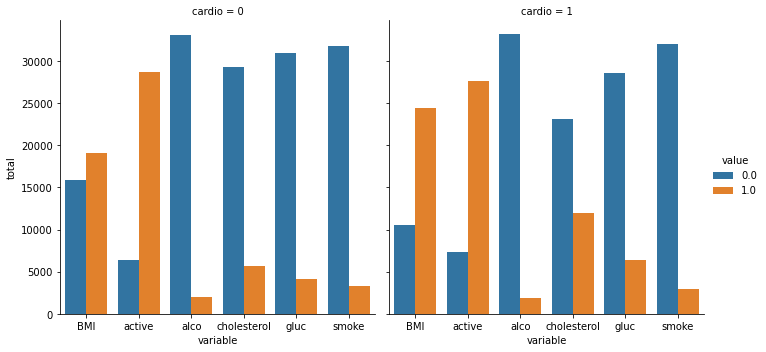

In [10]:
plot = sns.catplot(x="variable", y="total", col="cardio", hue="value", data=df, kind="bar")

## Heatmap.

For the heatmap was necesary first have cleanned the data. The data cleanning responds to the next tasks:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
+ height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
+ height is more than the 97.5th percentile
+ weight is less than the 2.5th percentile
+ weight is more than the 97.5th percentile




In [11]:
data_heat = data[(data['ap_lo'] <= data['ap_hi']) & (data['height'] >= data['height'].quantile(0.025))  & (data['height'] <= data['height'].quantile(0.975))  & (data['weight'] >= data['weight'].quantile(0.025)) & (data['weight'] <= data['weight'].quantile(0.975)) ]

In [12]:
corr = data_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [13]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

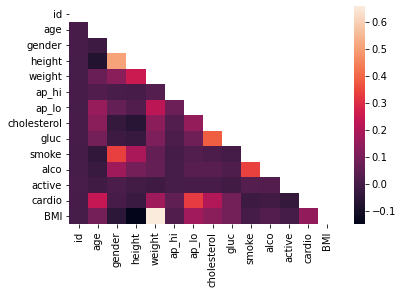

In [14]:
heat = sns.heatmap(corr, mask = mask)

# ToDo List:

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

- ~~Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.`~~
- ~~Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.~~
- ~~Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.~~
- Clean the data. Filter out the following patient segments that represent incorrect data:
- ~~diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
+ height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
+ height is more than the 97.5th percentile
+ weight is less than the 2.5th percentile
+ weight is more than the 97.5th percentile~~
- ~~Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.~~
Any time a variable is set to None, make sure to set it to the correct code.

Unit tests are written for you under test_module.py.